### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
print(data['car'].value_counts())
print(data['Bar'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['CarryAway'].value_counts())
print(data['RestaurantLessThan20'].value_counts())
print(data['Restaurant20To50'].value_counts())



car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


- <i>age shows as type object - should be converted to numeric


In [8]:
data[data.age.str.isnumeric() == False]['age'].value_counts()

age
50plus     1788
below21     547
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

<i>Observations</i>

- <i>car column has only 108 non-null values - missing 12576 values - we should ignore it for analysis
- <i>age has categoric info for some rows - for ages below 21 and above 50
- <i>Let's put 20 for 'below21' and 51 for '50plus' and make the column numeric for cleaner analysis

In [9]:
print(data[data.age.str.isnumeric() == False]['age'].value_counts())
# replace below21 value to 20 in age column
data['age'] = data['age'].replace('below21', value='20')

# replace 50plus value to 51 in age column
data['age'] = data['age'].replace('50plus', value='51')

print(data[data.age.str.isnumeric() == False]['age'].value_counts())

# convert column to numeric
data['age'] = pd.to_numeric(data['age'])

data['age'].dtype

age
50plus     1788
below21     547
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


dtype('int64')

- <i>Let's check the age distribution in the data - plot histogram

Text(0.5, 1.0, 'Histogram of Age')

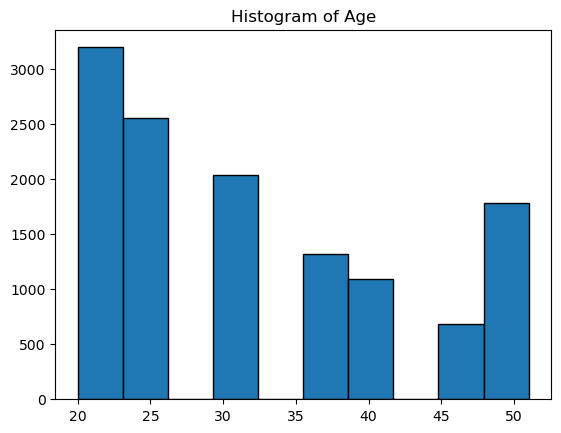

In [10]:
plt.hist(data['age'], edgecolor = 'black')
plt.title('Histogram of Age')

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
# define function to get acceptance pct
# num coupons accepted / total num of coupons
def accept_pct(df):
    return 100 * df[df.Y == 1].shape[0] / df.shape[0]


In [16]:
# proportion of coupons accepted
accept_pct(data)

56.84326710816777

- <i>About 57% chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


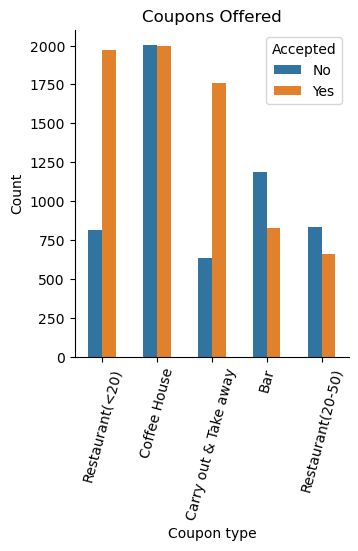

In [29]:
sns.catplot(data, x='coupon', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Coupons Offered")
plt.xlabel("Coupon type")
plt.ylabel("Count")
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.savefig("images/coupons_offered.png", bbox_inches='tight')

In [17]:
# proportion of Coffee House coupons offered
data[data.coupon == 'Coffee House'].shape[0]/data.shape[0]

0.315042573320719

In [18]:
# acceptance percentage of Restaurant(<20) coupons
accept_pct(data.query("coupon == 'Restaurant(<20)'"))

70.71069633883704

In [19]:
# acceptance percentage of Coffee House coupons
accept_pct(data.query("coupon == 'Coffee House'"))

49.92492492492492

In [21]:
# acceptance percentage of CarryAway coupons
accept_pct(data.query("coupon == 'Carry out & Take away'"))

73.54784788967822

<i>Observations</i>
- <i>Coffee House are the most issued (31.5%), with acceptance rate of about 50%
- <i>Restaurant(<20) and Carry out are the most accepted - 71% and 73.5% resp.
- <i>It may be worthwhile to investigate what makes Restaurant(<20) coupon so appealing

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

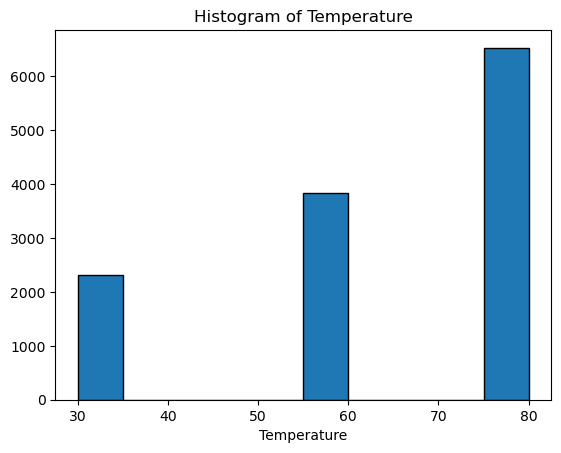

In [142]:
plt.hist(data['temperature'], edgecolor = 'black')
plt.xlabel("Temperature")
plt.title('Histogram of Temperature')

- <i>Let's see how temperature impacted acceptance

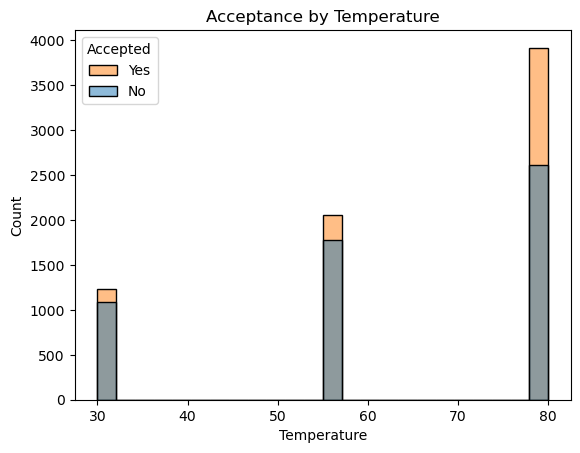

In [266]:
sns.histplot(data, x='temperature', hue='Y')
plt.title("Acceptance by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.legend(title='Accepted', labels=['Yes', 'No'])

- <i>more coupons issued during higher temperatures and it seems more percentage were accepted too
    
<i>Visualizing this with seaborn category plot

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


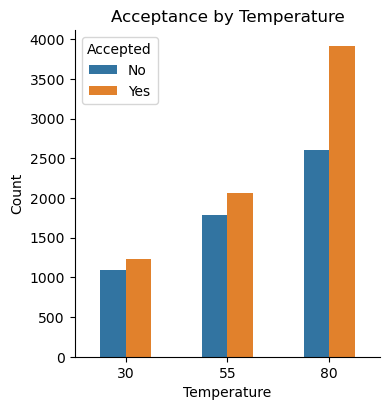

In [30]:
sns.catplot(data, x='temperature', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.title("Acceptance by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.savefig("images/accept_by_temp.png", bbox_inches='tight')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [143]:
print(data['coupon'].value_counts())

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


In [144]:
df_bar_coupons = data.query("coupon == 'Bar'")
df_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [241]:
# pct bar coupons accepted
accept_pct(df_bar_coupons)

41.00148735746158

- <i>41% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349

In [146]:
# column values indicating bar visits more than 3 times a month
tobar_gt3 = ['4~8', 'gt8']

# percent accepted from who went to bar 3 or fewer times
print(accept_pct(df_bar_coupons.query("Bar not in @tobar_gt3")))

# percent accepted from who went to bar more than 3 times
print(accept_pct(df_bar_coupons.query("Bar in @tobar_gt3")))


37.073707370737075
76.88442211055276


- <i>37% acceptance rate for those who went to a bar 3 or fewer times a month
- <i>~77% acceptance rate for those who went to a bar more than 3 times a month
- <i><u>Acceptance rate with those who went to bar more than 3 times a month is more than double that of those who did not


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [242]:
tobar_gt1 = ['1-3', '4~8', 'gt8']

# percent accepted from who went to bar more than once a month and age > 25
print(accept_pct(df_bar_coupons.query("(Bar in @tobar_gt1) and (age > 25)")))

# percent accepted from who went to bar more than 3 times
print(accept_pct(df_bar_coupons.query("Bar not in @tobar_gt1 or age <= 25")))

# Let's see if age had any impact - compare without the age criteria
print(accept_pct(df_bar_coupons.query("Bar in @tobar_gt1")))
print(accept_pct(df_bar_coupons.query("Bar not in @tobar_gt1")))


77.20588235294117
38.38383838383838
76.88442211055276
37.073707370737075


- <i>Acceptance rate with those who went to bar more than once a month and over age 25 (**77%**) is more than double that of those who did not (**38%**)
- <i>Age > 25 category does not seem to have a significant impact in this scenario - propensity of going to bar more frequently does

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


- <i>Check the values in the passanger and occupation columns

In [153]:
print(data['passanger'].value_counts())
print(data['occupation'].value_counts())


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service        

In [243]:
# values for had passengers that were not kids
pass_nokids = ['Friend(s)', 'Partner']
# percent accepted from who went to bar more than once a month and passengers who were not a kid 
# and occupation other than farming, fishing or forestry
print(accept_pct(df_bar_coupons.query("(Bar in @tobar_gt1) and (passanger in @pass_nokids) and (occupation != 'Farming Fishing & Forestry')")))

# percent acceptance in the rest of the candidates
print(accept_pct(df_bar_coupons.query("(Bar not in @tobar_gt1) or (passanger not in @pass_nokids) or (occupation == 'Farming Fishing & Forestry')")))


70.96774193548387
40.051150895140665


- <i>Acceptance rate is higher for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (**71%**) compared to the rest of the drivers (**40%**)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



- <i>Review values in the maritalStatus and income columns

In [162]:
print(data['maritalStatus'].value_counts())
print(data['income'].value_counts())


maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64
income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


In [245]:
# percent accepted from who went to bar more than once a month and had passengers who were not a kid and were not widowed
print(accept_pct(df_bar_coupons.query("(Bar in @tobar_gt1) and (passanger in @pass_nokids) and (maritalStatus != 'Widowed')")))


70.96774193548387


- <i>About 71% acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [164]:
# percent accepted from who went to bar more than once a month and are under age 30
print(accept_pct(df_bar_coupons.query("(Bar in @tobar_gt1) and (age < 30)")))


80.88235294117646


- <i>About 81% acceptance rate for those who went to bar more than once a month and are under age 30

In [246]:
# who go to cheap restaurants more than 4 times a month 
cheap_rest_gt4 = ['4~8', 'gt8']
# and income is less than 50K
income_lt50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

print(accept_pct(df_bar_coupons.query("(RestaurantLessThan20 in @cheap_rest_gt4) and (income in @income_lt50k)")))


45.348837209302324


- <i>About 45% acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- <i>The biggest of these factors seems to be how often they go to the bar - bar visitors of more than once a month are far more likely to accept Bar coupons
- <i>Age seems to have some influence - as observed in those under 30 category - should be explored further
- <i>Cheaper restaurant frequency and income could also have some influence on acceptance rate of Bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Restaurant(<20) Coupons**

For Restaurant(<20) coupon, find Acceptance rate for,
- overall category
- by gender
- by expiration
- by marital status
- by education
- by income
- by RestaurantLessThan20 visit frequency,

     - less than once a month to the rest

     - greater than 3 times a month to the rest(3 or less)






1. Create a new `DataFrame` that contains just the Restaurant(<20) coupons.


In [32]:
df_rest_lt20 = data.query("coupon == 'Restaurant(<20)'")
df_rest_lt20

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


2. Compute acceptance rate for Restaurant<20 coupons

In [233]:
accept_pct(df_rest_lt20)

70.71069633883704

- <i> ~71% of Restaurant<20 coupons were accepted

3. Plot accepted coupons vs unaccepted by gender

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


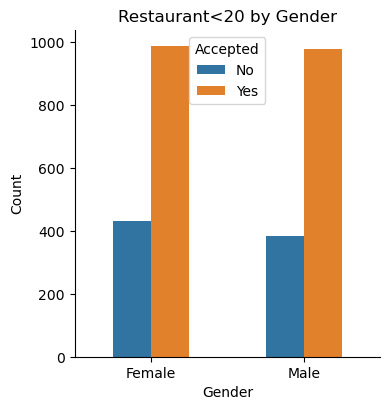

In [274]:
sns.catplot(df_rest_lt20, x='gender', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.title("Restaurant<20 by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper center', labels=['No', 'Yes'])

- <i> the plot above shows no clear impact by gender

4. Calculate acceptance rate for Restaurant<20 coupons by gender

In [236]:
print(accept_pct(df_rest_lt20.query("gender == 'Female'")))
print(accept_pct(df_rest_lt20.query("gender == 'Male'")))

69.66924700914849
71.7948717948718


- <i> ~70% of Restaurant<20 coupons were accepted when drivers were female</i>
- <i> ~72% of Restaurant<20 coupons were accepted when drivers were male</i>

5. Now, let's see the impact of coupon expiry time on acceptance of coupon
-  Visualize category plot for expiration showing accepted or not

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


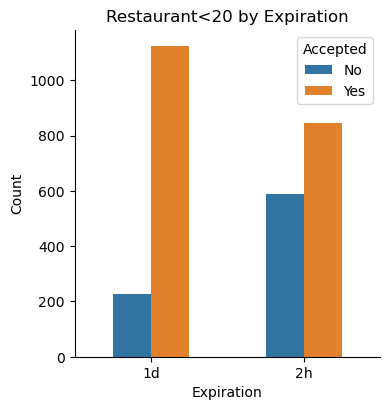

In [33]:
sns.catplot(df_rest_lt20, x='expiration', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.title("Restaurant<20 by Expiration")
plt.xlabel("Expiration")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])
plt.savefig("images/restlt20_by_exp.png", bbox_inches='tight')

<i>Observations<i>
- <i>Looks like a strong propensity of acceptance for 1d expiry vs 2h<i>
    

6. Acceptance rate for Restaurant<20 coupons by expiration time

In [237]:
print(accept_pct(df_rest_lt20.query("expiration == '1d'")))
print(accept_pct(df_rest_lt20.query("expiration == '2h'")))

83.16100443131462
58.93854748603352


- <i> ~83% of Restaurant<20 coupons were accepted when expiration was 1 day</i>
- <i> ~59% of Restaurant<20 coupons were accepted when expiration was 2 hours</i>

7. Let's see if marital status shows any relation on acceptance of coupon in this category

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


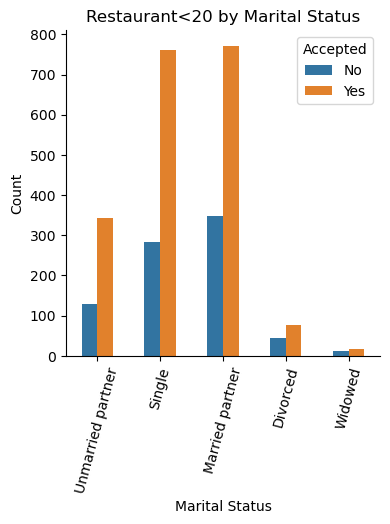

In [280]:
sns.catplot(df_rest_lt20, x='maritalStatus', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Restaurant<20 by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])

<i>No clear impact from marital status

8. Compare acceptance rates for Single and Married partner 

In [238]:
print(accept_pct(df_rest_lt20.query("maritalStatus == 'Single'")))
print(accept_pct(df_rest_lt20.query("maritalStatus == 'Married partner'")))

72.98850574712644
68.99016979445933


- <i>~73% acceptance rate for drivers who are Single
- <i>~69% acceptance rate for drivers who are Married partner

9. Now, compare education level impact on acceptance of Restaurant<20 coupons

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


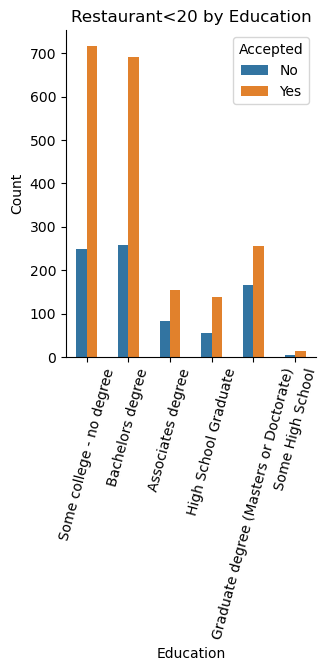

In [34]:
sns.catplot(df_rest_lt20, x='education', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Restaurant<20 by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])
plt.savefig("images/restlt20_by_edu.png", bbox_inches='tight')

- <i>some college or bachelors degree seems to have higher acceptance ratio

10. Compute acceptance rate for drivers with education as 'Some college - no degree' and 'Bachelors degree'

In [239]:
print(accept_pct(df_rest_lt20.query("education == 'Some college - no degree'")))
print(accept_pct(df_rest_lt20.query("education == 'Bachelors degree'")))

74.22360248447205
72.76550998948476


- <i> ~74% of Restaurant<20 coupons were accepted when offered to drivers with some college but no degree</i>
- <i> ~73% of Restaurant<20 coupons were accepted when offered to drivers Bachelors degree</i>

11. Plot acceptance by income categories

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


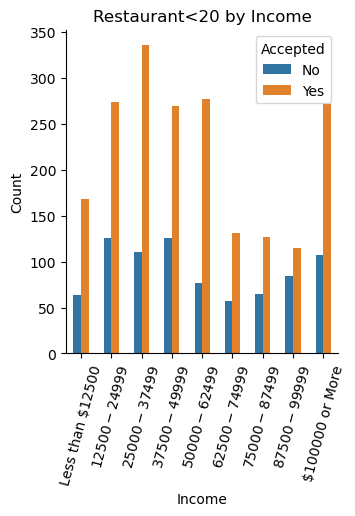

In [284]:
sns.catplot(df_rest_lt20, x='income', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'], 
            kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Restaurant<20 by Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])

- <i>no clear influence emerges from income levels

12. Compare the impact of history of frequency of visiting restaurants with average spend below $20

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


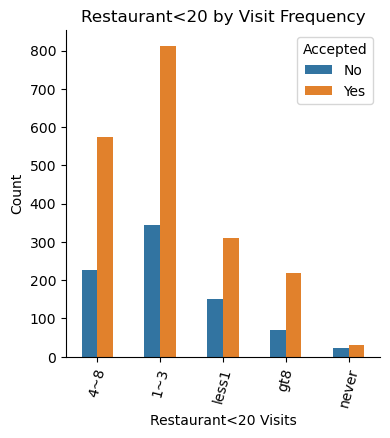

In [35]:
sns.catplot(df_rest_lt20, x='RestaurantLessThan20', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Restaurant<20 by Visit Frequency")
plt.xlabel("Restaurant<20 Visits")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])
plt.savefig("images/restlt20_by_visits.png", bbox_inches='tight')

- <i> higher history of frequency of visits per month seem to produce somewhat higher acceptance

13. What is the acceptance rate for those visiting the less than $20 restaurants less than once a month vs 3 or more times

In [240]:
print(accept_pct(df_rest_lt20.query("RestaurantLessThan20 in ['less1', 'never']")))
print(accept_pct(df_rest_lt20.query("RestaurantLessThan20 not in ['less1', 'never']")))

66.147859922179
71.74295774647888


- <i> ~66% of those visiting the less-than-$20 restaurants less than once a month accept the coupons
    
- <i> ~72% of those visiting the less-than-$20 restaurants more than once a month accept the coupons


14. Visualize impact of weather on acceptance of RestaurantLessThan20 coupons

C:\Users\niranjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


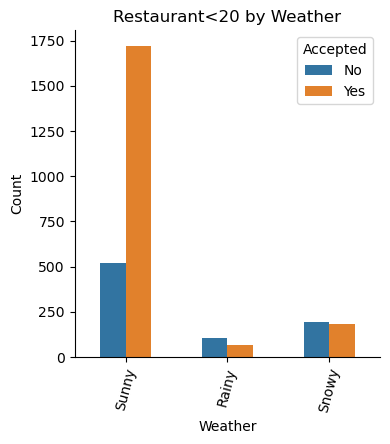

In [36]:
sns.catplot(df_rest_lt20, x='weather', kind='count', hue='Y', height=4, width=0.5, legend=False)
plt.xticks(rotation=75)
plt.title("Restaurant<20 by Weather")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(title='Accepted', loc='upper right', labels=['No', 'Yes'])
plt.savefig("images/restlt20_by_weather.png", bbox_inches='tight')

- <i>Shows a high percentage of acceptance in Sunny weather

15. What is the acceptance rate in Sunny weather. Compare against the full dataset as well.

In [255]:
# accept rate for Restaurant<20
print(accept_pct(df_rest_lt20.query("weather == 'Sunny'")))

# accept rate for whole data set
print(accept_pct(data.query("weather == 'Sunny'")))


76.83035714285714
59.4795908233191


- <i>~77% acceptance rate for Restaurant<20 coupon in Sunny weather
- <i>~59.5% acceptance rate for the whole data in Sunny weather
